In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Hello\Desktop\Time-Series Analysis Dataset.csv")

In [3]:
data

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(648, 12)

In [5]:
data.isnull().sum()

datetime_local      149
temperature         149
humidity            149
dew_point           149
wind_bearing        149
wind_speed          149
wind_gust           149
pressure            149
uv_index            149
ozone               149
precip_intensity    149
icon                149
dtype: int64

In [6]:
data=data.dropna(how='any',axis=0)

In [7]:
data.shape

(499, 12)

In [8]:
data.describe()

,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,27.797595,0.541082,15.871303,139.523046,2.267114,3.616974,1011.535411,1.641283,276.195792,0.009820
std,4.305725,0.498809,3.065238,118.438353,0.755191,1.608687,1.932765,2.493683,2.788063,0.036247
min,19.000000,0.000000,5.740000,0.000000,0.600000,0.840000,1005.970000,0.000000,268.600000,0.000000
25%,24.000000,0.000000,14.025000,44.000000,1.780000,2.460000,1010.235000,0.000000,274.600000,0.000000
50%,27.000000,1.000000,15.710000,105.000000,2.200000,3.220000,1011.430000,0.000000,276.100000,0.000000
75%,32.000000,1.000000,17.990000,217.500000,2.780000,4.345000,1012.675000,3.000000,277.800000,0.000000
max,36.000000,1.000000,22.350000,359.000000,4.180000,10.540000,1016.900000,8.000000,284.900000,0.420000


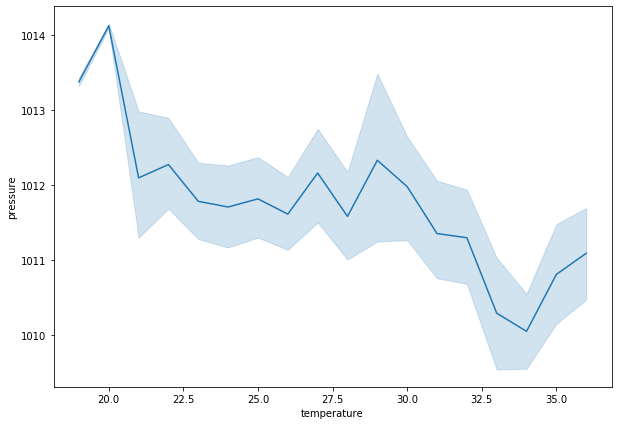

In [9]:
plt.figure(figsize=(10,7))
sns.lineplot(x="temperature",y="pressure",data=data)
plt.show()

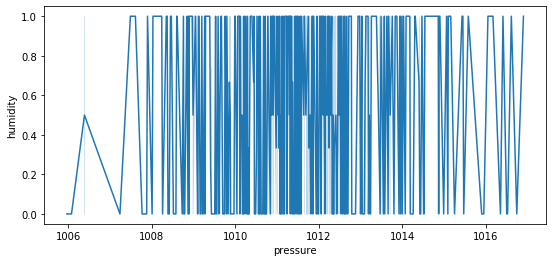

In [10]:
plt.figure(figsize=(9,4))
sns.lineplot(x="pressure",y="humidity",data=data)
plt.show()

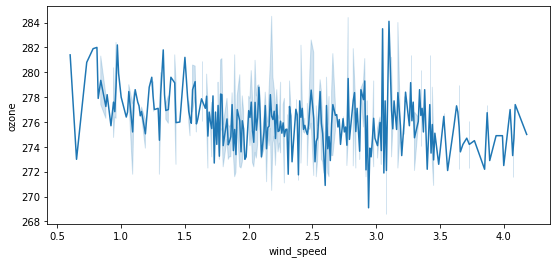

In [11]:
plt.figure(figsize=(9,4))
sns.lineplot(x="wind_speed",y="ozone",data=data)
plt.show()

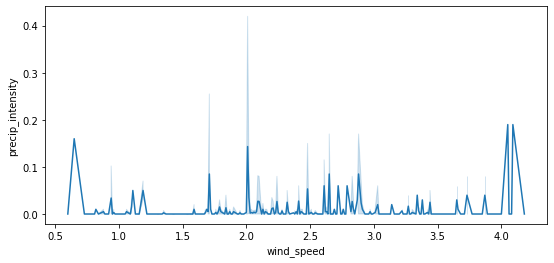

In [12]:
plt.figure(figsize=(9,4))
sns.lineplot(x="wind_speed",y="precip_intensity",data=data)
plt.show()

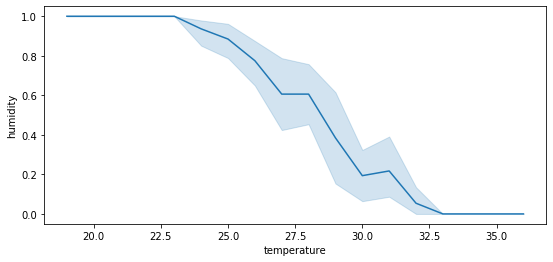

In [13]:
plt.figure(figsize=(9,4))
sns.lineplot(x="temperature",y="humidity",data=data)
plt.show()

In [14]:
train_data=data.iloc[:,1:2]

In [15]:
train_data

,temperature
0,26.0
1,25.0
2,25.0
3,24.0
4,23.0
...,...
494,32.0
495,32.0
496,32.0
497,31.0


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc=MinMaxScaler()

In [18]:
train=sc.fit_transform(train_data)

In [19]:
train

array([[0.41176471],
       [0.35294118],
       [0.35294118],
       [0.29411765],
       [0.23529412],
       [0.23529412],
       [0.29411765],
       [0.35294118],
       [0.35294118],
       [0.47058824],
       [0.52941176],
       [0.64705882],
       [0.70588235],
       [0.76470588],
       [0.82352941],
       [0.82352941],
       [0.82352941],
       [0.82352941],
       [0.76470588],
       [0.64705882],
       [0.52941176],
       [0.47058824],
       [0.47058824],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.35294118],
       [0.35294118],
       [0.29411765],
       [0.23529412],
       [0.29411765],
       [0.35294118],
       [0.41176471],
       [0.47058824],
       [0.52941176],
       [0.58823529],
       [0.64705882],
       [0.70588235],
       [0.76470588],
       [0.82352941],
       [0.82352941],
       [0.82352941],
       [0.76470588],
       [0.70588235],
       [0.58823529],
       [0.52941176],
       [0.52941176],
       [0.470

In [20]:
training_data_len = int(np.ceil( len(train_data) * .95 ))

training_data_len

475

In [21]:
x=[]
y=[]
for i in range(60,498):
    x.append(train[i-60:i,0])
    y.append(train[i+1,0])

In [22]:
type(x)

list

In [23]:
x_train=np.array(x)

In [24]:
x_train.shape

(438, 60)

In [25]:
y_train=np.array(y)

In [26]:
y_train.shape

(438,)

In [27]:
x_train.ndim

2

In [28]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [29]:
x_train.ndim

3

In [30]:
x_train.shape

(438, 60, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [32]:
model=Sequential()

In [33]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [34]:
model.add(Dense(units=1))

### compiling the model

In [35]:
model.compile(loss="mse",optimizer="adam",metrics=["mse"])

In [36]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
438/438 [==============================] - 20s 46ms/step - loss: 0.1378 - mse: 0.1378
Epoch 2/10
438/438 [==============================] - 10s 23ms/step - loss: 0.0825 - mse: 0.0825
Epoch 3/10
438/438 [==============================] - 11s 24ms/step - loss: 0.0751 - mse: 0.0751
Epoch 4/10
438/438 [==============================] - 10s 22ms/step - loss: 0.0646 - mse: 0.0646
Epoch 5/10
438/438 [==============================] - 11s 24ms/step - loss: 0.0405 - mse: 0.0405
Epoch 6/10
438/438 [==============================] - 11s 25ms/step - loss: 0.0175 - mse: 0.0175
Epoch 7/10
438/438 [==============================] - 12s 27ms/step - loss: 0.0120 - mse: 0.0120
Epoch 8/10
438/438 [==============================] - 12s 26ms/step - loss: 0.0131 - mse: 0.0131
Epoch 9/10
438/438 [==============================] - 11s 25ms/step - loss: 0.0097 - mse: 0.0097
Epoch 10/10
438/438 [==============================] - 12s 28ms/step - loss: 0.0091 - mse: 0.0091


### creating testing dataset

In [37]:
test=train[training_data_len-60:,:]

In [38]:
len(test)

84

In [39]:
x_test=[]
for i in range(60,len(test)):
    x_test.append(test[i-60:i,0])

In [40]:
x_test=np.array(x_test)
x_test

array([[0.23529412, 0.29411765, 0.35294118, ..., 0.82352941, 0.76470588,
        0.64705882],
       [0.29411765, 0.35294118, 0.47058824, ..., 0.76470588, 0.64705882,
        0.58823529],
       [0.35294118, 0.47058824, 0.58823529, ..., 0.64705882, 0.58823529,
        0.47058824],
       ...,
       [0.11764706, 0.11764706, 0.17647059, ..., 0.76470588, 0.76470588,
        0.76470588],
       [0.11764706, 0.17647059, 0.17647059, ..., 0.76470588, 0.76470588,
        0.76470588],
       [0.17647059, 0.17647059, 0.23529412, ..., 0.76470588, 0.76470588,
        0.70588235]])

In [41]:
y_test = train[training_data_len:, :]

In [42]:
y_test.shape

(24, 1)

In [43]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [44]:
x_test.shape

(24, 60, 1)

In [81]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

In [82]:
train1 = train_data[:training_data_len]
valid = train_data[training_data_len:]
valid['predictions'] = predictions

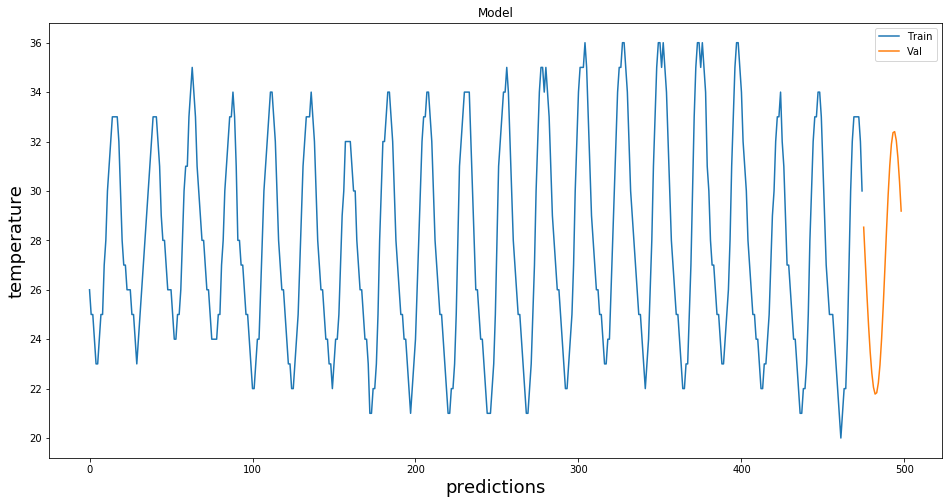

In [84]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('predictions', fontsize=18)
plt.ylabel('temperature', fontsize=18)
plt.plot(train1['temperature'])
plt.plot(valid['predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()